In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import reuters
from tensorflow.keras import models, layers, utils
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(train_data, train_labels),(test_data,test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 3s 2us/step


In [4]:
print('Train Data:',len(train_data))
print('Test Data:', len(test_data))

Train Data: 8982
Test Data: 2246


In [5]:
print(train_data[0])
print(train_labels[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
3


In [7]:
def vectorize_sequence(sequence, dimensions=10000):
    result = np.zeros((len(sequence),dimensions))
    for i,sequence in enumerate(sequence):
        result[i,sequence] = 1
    return result

In [8]:
x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

In [9]:
#manually doing one_hot_encoding
#46 because reuters data classified into 46 classes
def one_hot_encoding(label, dimensions=46):
    result = np.zeros((len(label),dimensions))
    for i,label in enumerate(label):
        result[i,label] = 1
    return result
#code just for knowledge

In [10]:
y_train = utils.to_categorical(train_labels)
y_test = utils.to_categorical(test_labels)

In [22]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [23]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['acc'])

In [24]:
x_valid = x_train[:1000]
partial_x_train = x_train[1000:]
y_valid = y_train[:1000]
partial_y_train = y_train[1000:]

In [25]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_valid,y_valid))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 4s 441us/sample - loss: 2.6079 - acc: 0.5153 - val_loss: 1.7388 - val_acc: 0.6440
Epoch 2/20
7982/7982 [==============================] - 2s 278us/sample - loss: 1.4403 - acc: 0.7032 - val_loss: 1.3330 - val_acc: 0.7130
Epoch 3/20
7982/7982 [==============================] - 2s 277us/sample - loss: 1.0722 - acc: 0.7671 - val_loss: 1.1677 - val_acc: 0.7590
Epoch 4/20
7982/7982 [==============================] - 2s 266us/sample - loss: 0.8464 - acc: 0.8142 - val_loss: 1.0414 - val_acc: 0.7880
Epoch 5/20
7982/7982 [==============================] - 2s 266us/sample - loss: 0.6773 - acc: 0.8548 - val_loss: 0.9676 - val_acc: 0.8030
Epoch 6/20
7982/7982 [==============================] - 2s 271us/sample - loss: 0.5409 - acc: 0.8882 - val_loss: 0.9261 - val_acc: 0.8080
Epoch 7/20
7982/7982 [==============================] - 2s 270us/sample - loss: 0.4309 - acc: 0.9129 - val_loss: 0.8963 - va

In [26]:
history_dict = history.history
print(history_dict)

{'loss': [2.607912421555066, 1.440327908872692, 1.0722129574636863, 0.8464234877696045, 0.6773039221435047, 0.5408684453684057, 0.4308884541243427, 0.3551239269593998, 0.2863097943942429, 0.24680194760497964, 0.20963177333959987, 0.18189694986131907, 0.16657960340212652, 0.15226138534177905, 0.13582821675363682, 0.13342598694827257, 0.12651475870468898, 0.11883629820036787, 0.11761848694980667, 0.11112519306770335], 'acc': [0.5152844, 0.7032072, 0.767101, 0.81420696, 0.8547983, 0.88824856, 0.9129291, 0.926209, 0.93898773, 0.9441243, 0.95114005, 0.9533951, 0.95264345, 0.95314455, 0.9580306, 0.9571536, 0.9560261, 0.95727885, 0.9579053, 0.9581559], 'val_loss': [1.7387865982055664, 1.3330371198654174, 1.1677099113464355, 1.0413777713775634, 0.967559907913208, 0.9261351919174194, 0.8963365797996521, 0.8774191956520081, 0.9064351935386658, 0.9002517437934876, 0.9090801601409912, 0.9086315250396728, 0.9356354293823242, 0.9607243094444274, 0.9823406934738159, 1.0365592603683471, 1.003705019950

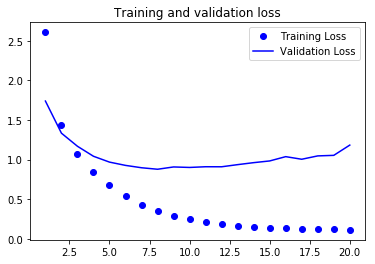

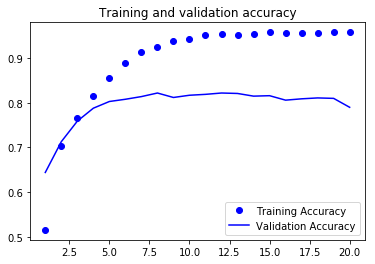

In [27]:
loss = history_dict['loss']
val_loss = history_dict['val_loss']
accuracy = history_dict['acc']
val_accuracy = history_dict['val_acc']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

plt.clf

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

In [28]:
prediction = model.predict(x_test)

In [29]:
prediction[0]

array([2.2994800e-06, 7.4413393e-08, 1.5356129e-08, 9.6148849e-01,
       3.8418517e-02, 1.0552393e-08, 8.4476953e-11, 3.3448956e-07,
       6.6990037e-06, 1.0706846e-07, 1.2093123e-07, 5.4187130e-05,
       3.3325019e-08, 9.8862574e-06, 2.1981418e-08, 5.7264099e-10,
       5.1870825e-07, 3.7799467e-07, 9.3049030e-10, 1.3665393e-05,
       4.5908442e-07, 1.7547349e-07, 4.6822518e-11, 1.0517329e-08,
       3.8091133e-07, 7.6888435e-10, 2.3723181e-09, 2.8845210e-10,
       1.0416174e-08, 7.2182559e-08, 1.0232209e-06, 1.9588375e-08,
       1.5331400e-08, 2.2136322e-09, 1.6128894e-07, 1.3103261e-07,
       1.4621376e-06, 4.9691952e-11, 4.4402097e-07, 3.1812345e-07,
       1.7830614e-09, 1.6019014e-07, 2.5400506e-11, 1.0850316e-08,
       3.1953107e-10, 1.2964305e-11], dtype=float32)

In [33]:
#sum of all 46 classes probabilities
prediction[0].sum()

1.0000001

In [31]:
prediction.shape

(2246, 46)

In [34]:
prediction[0].argmax()

3

## Doing some chnages in model

In [35]:
y_train = np.array(train_labels)

In [36]:
y_train

array([ 3,  4,  3, ..., 25,  3, 25], dtype=int64)

In [37]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [38]:
model.fit(x_train,y_train, epochs=20, batch_size=512)

Train on 8982 samples
Epoch 1/20
8982/8982 [==============================] - 4s 405us/sample - loss: 0.2312 - acc: 0.9399
Epoch 2/20
8982/8982 [==============================] - 2s 235us/sample - loss: 0.1594 - acc: 0.9502
Epoch 3/20
8982/8982 [==============================] - 2s 237us/sample - loss: 0.1465 - acc: 0.9495
Epoch 4/20
8982/8982 [==============================] - 2s 236us/sample - loss: 0.1301 - acc: 0.9551
Epoch 5/20
8982/8982 [==============================] - 2s 238us/sample - loss: 0.1229 - acc: 0.9537
Epoch 6/20
8982/8982 [==============================] - 2s 237us/sample - loss: 0.1185 - acc: 0.9548
Epoch 7/20
8982/8982 [==============================] - 2s 237us/sample - loss: 0.1111 - acc: 0.9550
Epoch 8/20
8982/8982 [==============================] - 2s 237us/sample - loss: 0.1112 - acc: 0.9559
Epoch 9/20
8982/8982 [==============================] - 2s 239us/sample - loss: 0.1077 - acc: 0.9552
Epoch 10/20
8982/8982 [==============================] - 2s 245us/sam

In [39]:
prediction = model.predict(x_test)
prediction[0].argmax()

3